In [15]:
import scanpy as sc
import cellbin_moran as cm
import squidpy as sq
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor, as_completed

# Scanpy Settings
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

-----
anndata     0.10.7
scanpy      1.10.1
-----
PIL                         9.2.0
anyio                       NA
arrow                       1.3.0
asciitree                   NA
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
babel                       2.14.0
brotli                      1.1.0
cellbin_moran               NA
certifi                     2024.02.02
cffi                        1.16.0
charset_normalizer          3.3.2
cloudpickle                 3.0.0
colorama                    0.4.6
comm                        0.2.2
cycler                      0.12.1
cython_runtime              NA
dask                        2024.4.2
dask_expr                   1.0.13
dask_image                  2023.08.1
datashader                  0.16.1
datatree                    0.0.14
dateutil                    2.9.0
debugpy                     1.8.1
decorator                   5.1.1
defusedxml                  0.7.1
dill                       

In [16]:
dir(cm)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'analysis',
 'compute_moranI',
 'concatenate_and_intersect',
 'hierarchical_sample',
 'io',
 'list_files_matching_criteria',
 'load_data_in_parallel',
 'load_sct_and_set_index',
 'subset_anndata']

In [ ]:
month = "01"

# Reusing the previously defined functions:
cellbin_dir = "/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/sct_cellbin_h5ad"
meta_dir = "/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/region_meta/"

# Use the function to list and filter files of interest
cellbin_paths = cm.list_files_matching_criteria(cellbin_dir, month)
meta_paths = cm.list_files_matching_criteria(meta_dir, month)


cellbin_paths

In [11]:
# Load data in parallel from paths
cellbin_data = cm.load_data_in_parallel(cellbin_paths, cm.load_sct_and_set_index)


In [27]:
cellbins = {}
for key, value in cellbin_data.items():
    cellbins[key.split(sep = "_")[0]] = value

#### Temeral Definition 

In [17]:
def read_and_process_metadata(directory, criteria):
    meta_paths = list_files_matching_criteria(directory, criteria)
    meta_data = {}
    for key, value in meta_paths.items():
        df = pd.read_csv(value)
        df["celltype"] = df["fine"].str.split("-").str[0]
        df = df.applymap(lambda x: 'NA' if str(x).lower() == 'nan' else x)
        meta_data[key] = df
    return meta_data

# Assuming `load_sct_and_set_index` is a predefined function that loads and processes data from a file path.
# Define this function according to your specific requirements.
def merge_data(cellbin_data, meta_data):
    for key in cellbin_data:
        if key in meta_data:
            cellbin_data[key].obs = meta_data[key]




In [18]:
# Read and process metadata
meta_data = read_and_process_metadata(meta_dir, month)

/tmp/ipykernel_237928/109195940.py:5: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(value)
/tmp/ipykernel_237928/109195940.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 'NA' if str(x).lower() == 'nan' else x)
/tmp/ipykernel_237928/109195940.py:5: DtypeWarning: Columns (38,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(value)
/tmp/ipykernel_237928/109195940.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 'NA' if str(x).lower() == 'nan' else x)
/tmp/ipykernel_237928/109195940.py:5: DtypeWarning: Columns (38,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(value)
/tmp/ipykernel_237928/109195940.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map i

In [30]:
cellbins.keys()

dict_keys(['HZ12M01', 'HZ2M01', 'HZ3M01', 'HZ4MP101', 'HZ5M01', 'HZ6MP101', 'HZ8M01'])

In [31]:
# Merge data based on keys
merge_data(cellbins, meta_data)

for key in cellbins:
    cellbins[key].obs["datatype"] = "cellbin"

In [33]:
cellbin_raw = {}
for key, value in cellbins.items():
    cellbin_raw[key] = value.raw.to_adata()


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-package

In [34]:
cellbin_combined = ad.concat(list(cellbin_raw.values()), merge = "same")

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [36]:
dir(cm)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'analysis',
 'compute_moranI',
 'concatenate_and_intersect',
 'hierarchical_sample',
 'io',
 'list_files_matching_criteria',
 'load_data_in_parallel',
 'load_sct_and_set_index',
 'subset_anndata']

In [39]:
cellbin_combined.obs["Structure Name"].unique()

array(['NA', 'Prefrontal cortex', 'Striatum', 'Hippocampal formation',
       'Basal forebrain'], dtype=object)

In [40]:
cellbin_pfc = cm.subset_anndata(cellbin_combined, {"Structure Name": "Prefrontal cortex"})

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [41]:
cellbin_pfc

AnnData object with n_obs × n_vars = 315755 × 19562
    obs: 'Unnamed: 0', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y', 'fine', 'genotype', 'month', 'sample', 'slice', 'id_A', 'age', 'nearest_plaque', 'interval', 'min_center_dist', 'min_border_dist', 'plaque_region', 'celltype', 'nCount_SCT', 'nFeature_SCT', 'nearest_index', 'struct_id', 'acronym_x', 'id_B', 'atlas_id', 'name', 'acronym_y', 'st_level', 'ontology_id', 'hemisphere_id', 'weight', 'parent_structure_id', 'depth', 'graph_id', 'graph_order', 'structure_id_path', 'color_hex_triplet', 'neuro_name_structure_id', 'neuro_name_structure_id_path', 'failed', 'sphinx_id', 'structure_name_facet', 'failed_facet', 'safe_name', 'total_voxel_counts (10 um)', 'Structure independently delineated (not merged to form parents)', 'Major Division', '"Summary Structure" Level for Analyses', 'Structure Name', 'datatype'

In [43]:
region_dir = "/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/sn_sct_h5ad/"
region_files = os.listdir(region_dir)
region_paths = {file.split(sep = "_")[0]: os.path.join(region_dir, file) for file in region_files}

In [45]:
sn_ref = cm.load_sct_and_set_index(region_paths["PFC"])

In [50]:
sn_raw = sn_ref.raw.to_adata()

In [53]:
sn_raw.obs["genotype"].unique()

array(['5xFAD', 'WT'], dtype=object)

In [55]:
sn_ad = cm.subset_anndata(sn_raw, {"genotype": "5xFAD"})

In [57]:
sn_ad.obs["datatype"] = "sn"

In [59]:
sn_ad

AnnData object with n_obs × n_vars = 193724 × 18700
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'genotype', 'month', 'sample', 'slice', 'batch', 'plaque', 'plaque_delta', 'percent.mito', 'percent.rb', 'RNA_snn_res.0.2', 'seurat_clusters', 'celltype', 'fine', 'nCount_SCT', 'nFeature_SCT', 'datatype'

In [63]:
ann_list = [sn_ad, cellbin_pfc]

# 2. Start Integration

## 2.1 Functions Definitions

In [69]:
def preprocess_data(adata, min_mean=0.0125, max_mean=3, min_disp=0.5, n_pcs=50):
    """
    Preprocess the AnnData object including normalization, scaling, and PCA.
    """
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, min_mean=min_mean, max_mean=max_mean, min_disp=min_disp)
    adata = adata[:, adata.var.highly_variable]
    sc.pp.scale(adata, max_value=10)
    sc.pp.pca(adata, n_comps=n_pcs)
    return adata

In [71]:
combined_adata = cm.concatenate_and_intersect(ann_list)
combined_adata.layers["counts"] = combined_adata.X
# Preprocess the data
combined_adata = preprocess_data(combined_adata)


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


normalizing counts per cell
    finished (0:00:11)
extracting highly variable genes
    finished (0:01:30)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/scanpy/preprocessing/_scale.py:299: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


computing PCA
    with n_comps=50
    finished (0:08:08)


## 2.2 Harmony

In [72]:
sc.external.pp.harmony_integrate(combined_adata, key="datatype")

2024-05-20 01:38:59,227 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-05-20 01:42:55,614 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-20 01:43:02,848 - harmonypy - INFO - Iteration 1 of 10
2024-05-20 01:54:49,223 - harmonypy - INFO - Iteration 2 of 10
2024-05-20 02:07:20,781 - harmonypy - INFO - Converged after 2 iterations


In [73]:
sc.pp.neighbors(combined_adata, n_neighbors = 5,use_rep="X_pca_harmony")
sc.tl.umap(combined_adata)
combined_adata.obsm["X_umap_harmony_n5"] = combined_adata.obsm['X_umap']

computing neighbors


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:05:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:20:04)


In [ ]:
sc.pp.neighbors(combined_adata, n_neighbors = 15,use_rep="X_pca_harmony")
sc.tl.umap(combined_adata)
combined_adata.obsm["X_umap_harmony_n15"] = combined_adata.obsm['X_umap']

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:06:30)
computing UMAP


IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


In [74]:
cellbin_har = cm.subset_anndata(combined_adata, {"datatype": "cellbin"})

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [77]:
result_dfs = {}
for key in cellbin_har.obs["sample"].unique():
    mask = cellbin_har.obs["sample"] == key
    result_dfs[key] = cm.compute_moranI(cellbin_har[mask], ["min_center_dist"]) 

Astro: 6061
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:10<00:00,  9.21/s]


Adding `adata.uns['moranI']`
Finish (0:00:19)
ExN: 21788
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:10<00:00,  9.67/s]


Adding `adata.uns['moranI']`
Finish (0:00:18)
Olig: 1402
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 12.39/s]


Adding `adata.uns['moranI']`
Finish (0:00:16)
InN: 2905
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 12.20/s]


Adding `adata.uns['moranI']`
Finish (0:00:16)
Endo: 842
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 11.50/s]


Adding `adata.uns['moranI']`
Finish (0:00:17)
Micro: 2666
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:07<00:00, 12.74/s]


Adding `adata.uns['moranI']`
Finish (0:00:15)
OPC: 513
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 12.12/s]


Adding `adata.uns['moranI']`
Finish (0:00:16)
Peri: 528
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 12.40/s]


Adding `adata.uns['moranI']`
Finish (0:00:17)
SMC: 1204
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.29/s]


Adding `adata.uns['moranI']`
Finish (0:00:18)
Astro: 3190
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.59/s]


Adding `adata.uns['moranI']`
Finish (0:00:17)
SMC: 101
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 12.22/s]


Adding `adata.uns['moranI']`
Finish (0:00:17)
Micro: 854
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.41/s]


Adding `adata.uns['moranI']`
Finish (0:00:18)
Peri: 576
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:10<00:00,  9.97/s]


Adding `adata.uns['moranI']`
Finish (0:00:19)
ExN: 25330
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:12<00:00,  8.12/s]


Adding `adata.uns['moranI']`
Finish (0:00:20)
Olig: 1983
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 11.69/s]


Adding `adata.uns['moranI']`
Finish (0:00:16)
InN: 4312
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:10<00:00,  9.24/s]


Adding `adata.uns['moranI']`
Finish (0:00:19)
OPC: 283
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:10<00:00,  9.24/s]


Adding `adata.uns['moranI']`
Finish (0:00:18)
Endo: 551
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 11.11/s]


Adding `adata.uns['moranI']`
Finish (0:00:18)
MSN: 67
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.12/s]


Adding `adata.uns['moranI']`
Finish (0:00:18)
Astro: 2697
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.23/s]


Adding `adata.uns['moranI']`
Finish (0:00:17)
Peri: 1351
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.51/s]


Adding `adata.uns['moranI']`
Finish (0:00:18)
Olig: 2377
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 11.88/s]


Adding `adata.uns['moranI']`
Finish (0:00:15)
Micro: 800
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 11.16/s]


Adding `adata.uns['moranI']`
Finish (0:00:19)
InN: 5212
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.45/s]


Adding `adata.uns['moranI']`
Finish (0:00:18)
Endo: 221
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 11.89/s]


Adding `adata.uns['moranI']`
Finish (0:00:17)
SMC: 163
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 11.78/s]


Adding `adata.uns['moranI']`
Finish (0:00:17)
ExN: 17447
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:10<00:00,  9.13/s]


Adding `adata.uns['moranI']`
Finish (0:00:19)
OPC: 387
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.52/s]


Adding `adata.uns['moranI']`
Finish (0:00:18)
MSN: 11
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 11.17/s]


Adding `adata.uns['moranI']`
Finish (0:00:17)
Astro: 4737
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.41/s]


Adding `adata.uns['moranI']`
Finish (0:00:18)
Peri: 2045
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:07<00:00, 14.17/s]


Adding `adata.uns['moranI']`
Finish (0:00:15)
SMC: 1877
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.80/s]


Adding `adata.uns['moranI']`
Finish (0:00:17)
Olig: 4183
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.79/s]


Adding `adata.uns['moranI']`
Finish (0:00:17)
Micro: 2783
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.81/s]


Adding `adata.uns['moranI']`
Finish (0:00:19)
OPC: 578
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.93/s]


Adding `adata.uns['moranI']`
Finish (0:00:18)
InN: 7966
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.90/s]


Adding `adata.uns['moranI']`
Finish (0:00:19)
ExN: 29130
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:12<00:00,  7.90/s]


Adding `adata.uns['moranI']`
Finish (0:00:22)
Endo: 1085
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.97/s]


Adding `adata.uns['moranI']`
Finish (0:00:18)
MSN: 31
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.45/s]


Adding `adata.uns['moranI']`
Finish (0:00:19)
Peri: 1055
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:10<00:00,  9.83/s]


Adding `adata.uns['moranI']`
Finish (0:00:19)
Astro: 1561
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 12.29/s]


Adding `adata.uns['moranI']`
Finish (0:00:19)
ExN: 36852
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:13<00:00,  7.68/s]


Adding `adata.uns['moranI']`
Finish (0:00:22)
InN: 8406
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:11<00:00,  8.52/s]


Adding `adata.uns['moranI']`
Finish (0:00:21)
Olig: 1846
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.56/s]


Adding `adata.uns['moranI']`
Finish (0:00:18)
OPC: 475
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:06<00:00, 15.83/s]


Adding `adata.uns['moranI']`
Finish (0:00:14)
SMC: 258
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:06<00:00, 14.77/s]


Adding `adata.uns['moranI']`
Finish (0:00:16)
Micro: 1030
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.72/s]


Adding `adata.uns['moranI']`
Finish (0:00:20)
MSN: 143
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:07<00:00, 12.84/s]


Adding `adata.uns['moranI']`
Finish (0:00:17)
Endo: 268
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 11.88/s]


Adding `adata.uns['moranI']`
Finish (0:00:17)
SMC: 1105
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:07<00:00, 13.08/s]


Adding `adata.uns['moranI']`
Finish (0:00:16)
Astro: 6821
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:10<00:00,  9.54/s]


Adding `adata.uns['moranI']`
Finish (0:00:20)
Olig: 4831
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.68/s]


Adding `adata.uns['moranI']`
Finish (0:00:18)
InN: 6870
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:11<00:00,  8.76/s]


Adding `adata.uns['moranI']`
Finish (0:00:21)
Endo: 1894
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 11.17/s]


Adding `adata.uns['moranI']`
Finish (0:00:16)
ExN: 26760
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:11<00:00,  9.06/s]


Adding `adata.uns['moranI']`
Finish (0:00:17)
Peri: 2121
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 11.85/s]


Adding `adata.uns['moranI']`
Finish (0:00:14)
Micro: 4547
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 11.48/s]


Adding `adata.uns['moranI']`
Finish (0:00:17)
OPC: 416
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 11.42/s]


Adding `adata.uns['moranI']`
Finish (0:00:17)
MSN: 138
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:06<00:00, 14.48/s]


Adding `adata.uns['moranI']`
Finish (0:00:16)
SMC: 2444
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:07<00:00, 12.54/s]


Adding `adata.uns['moranI']`
Finish (0:00:17)
Micro: 4965
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:10<00:00,  9.37/s]


Adding `adata.uns['moranI']`
Finish (0:00:19)
Astro: 3345
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.14/s]


Adding `adata.uns['moranI']`
Finish (0:00:18)
Peri: 2199
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 11.31/s]


Adding `adata.uns['moranI']`
Finish (0:00:16)
Olig: 2753
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:07<00:00, 13.72/s]


Adding `adata.uns['moranI']`
Finish (0:00:16)
Endo: 919
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 11.56/s]


Adding `adata.uns['moranI']`
Finish (0:00:17)
OPC: 467
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.93/s]


Adding `adata.uns['moranI']`
Finish (0:00:17)
ExN: 26164
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:10<00:00,  9.23/s]


Adding `adata.uns['moranI']`
Finish (0:00:18)
InN: 4826
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:09<00:00, 10.24/s]


Adding `adata.uns['moranI']`
Finish (0:00:18)
MSN: 39
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:08<00:00, 11.92/s]


Adding `adata.uns['moranI']`
Finish (0:00:18)


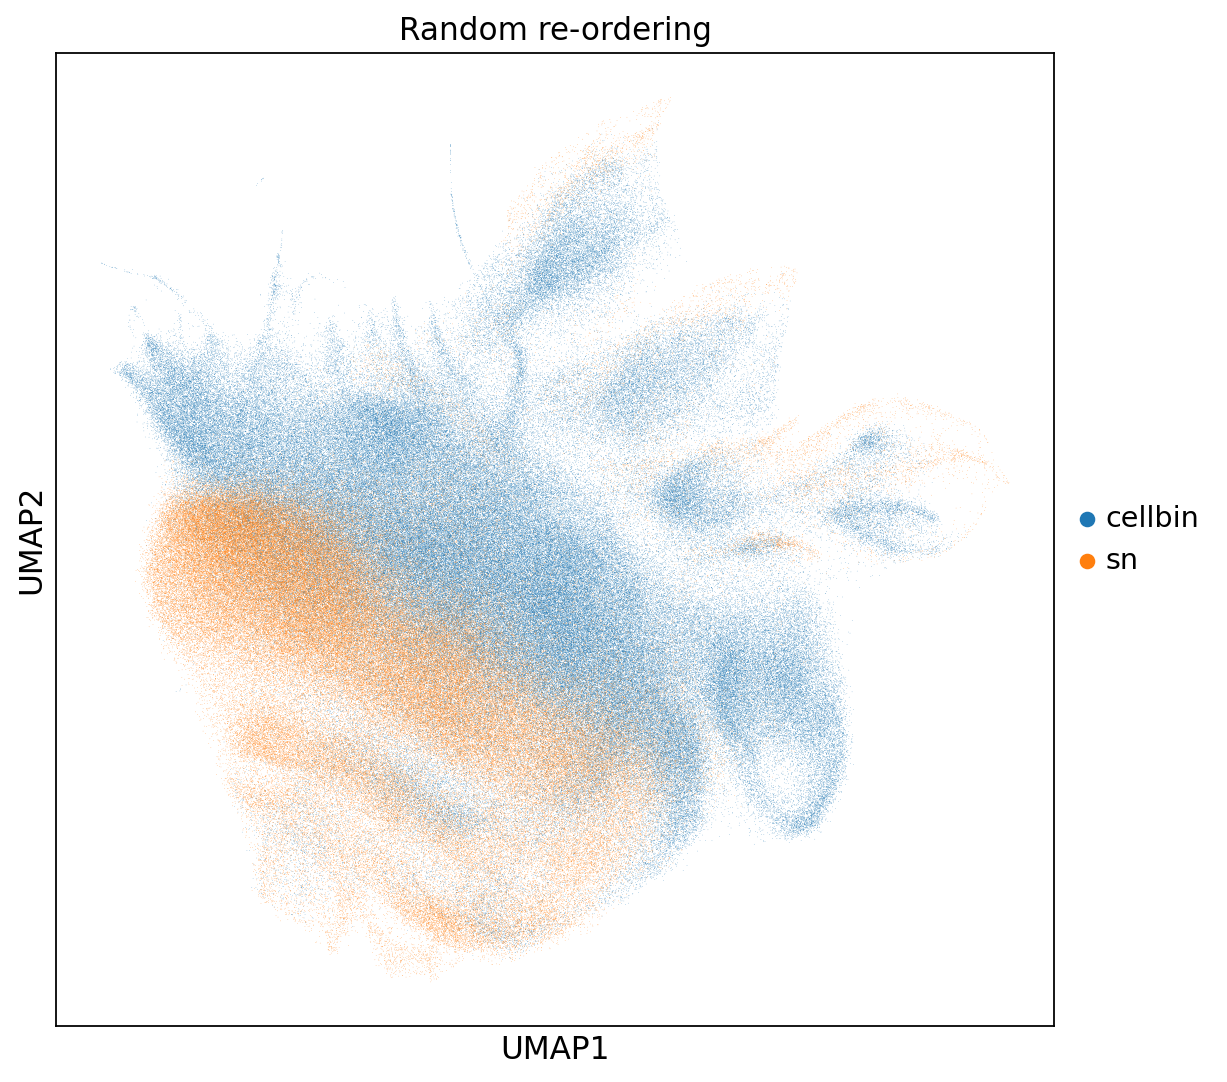

In [85]:
np.random.seed(0)
random_indices = np.random.permutation(list(range(combined_adata.shape[0])))
sc.pl.umap(
    combined_adata[random_indices, :], color="datatype", title="Random re-ordering"
)

In [82]:
combined_adata.obs["celltype"] = combined_adata.obs["fine"].str.split("-").str[0]

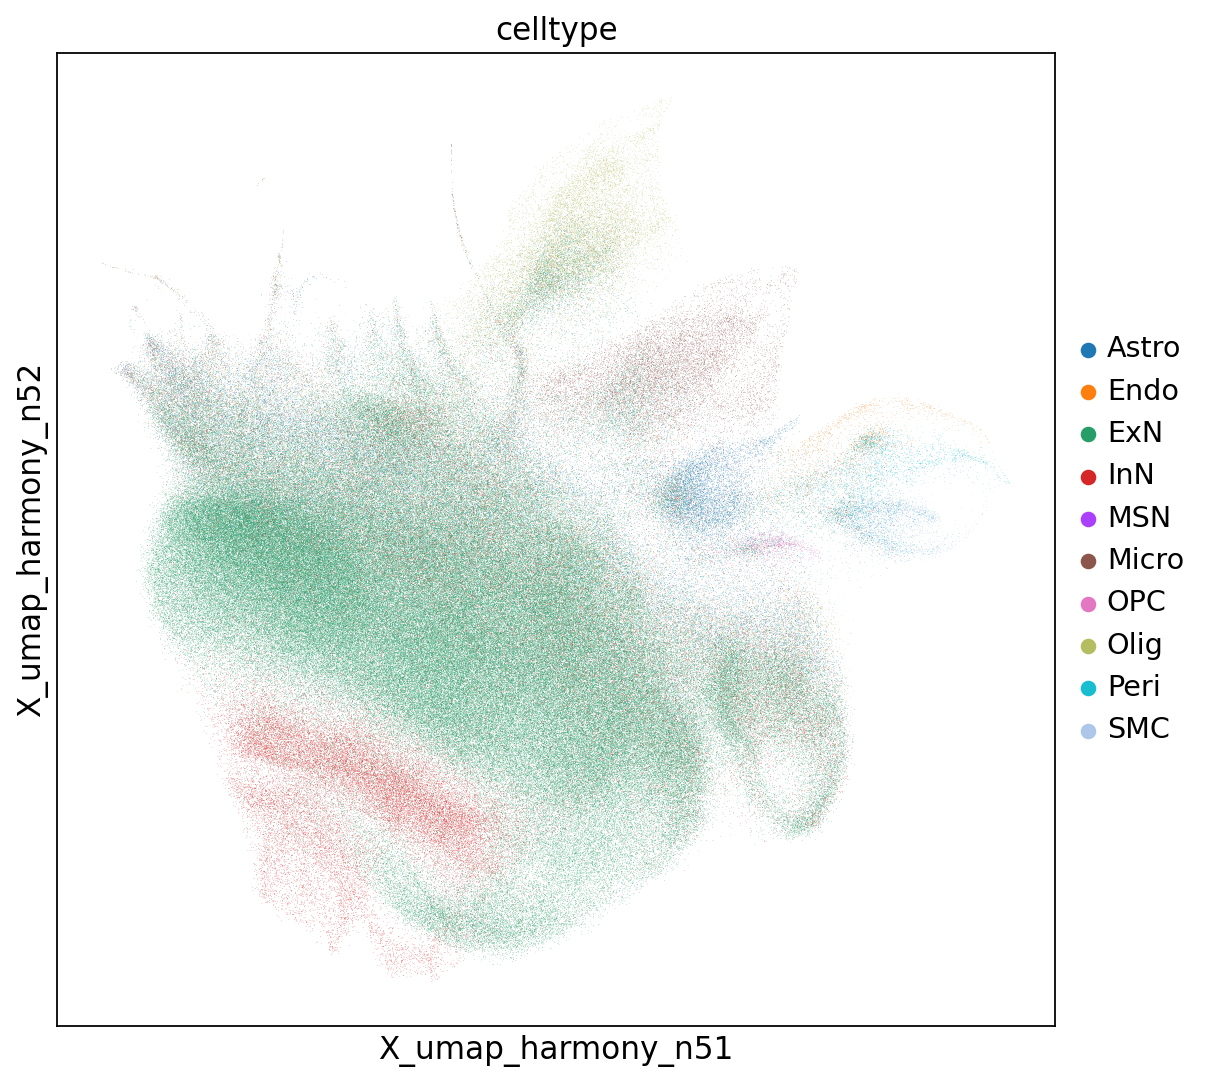

In [90]:
sc.pl.embedding(combined_adata, basis = "X_umap_harmony_n5", color = "celltype")

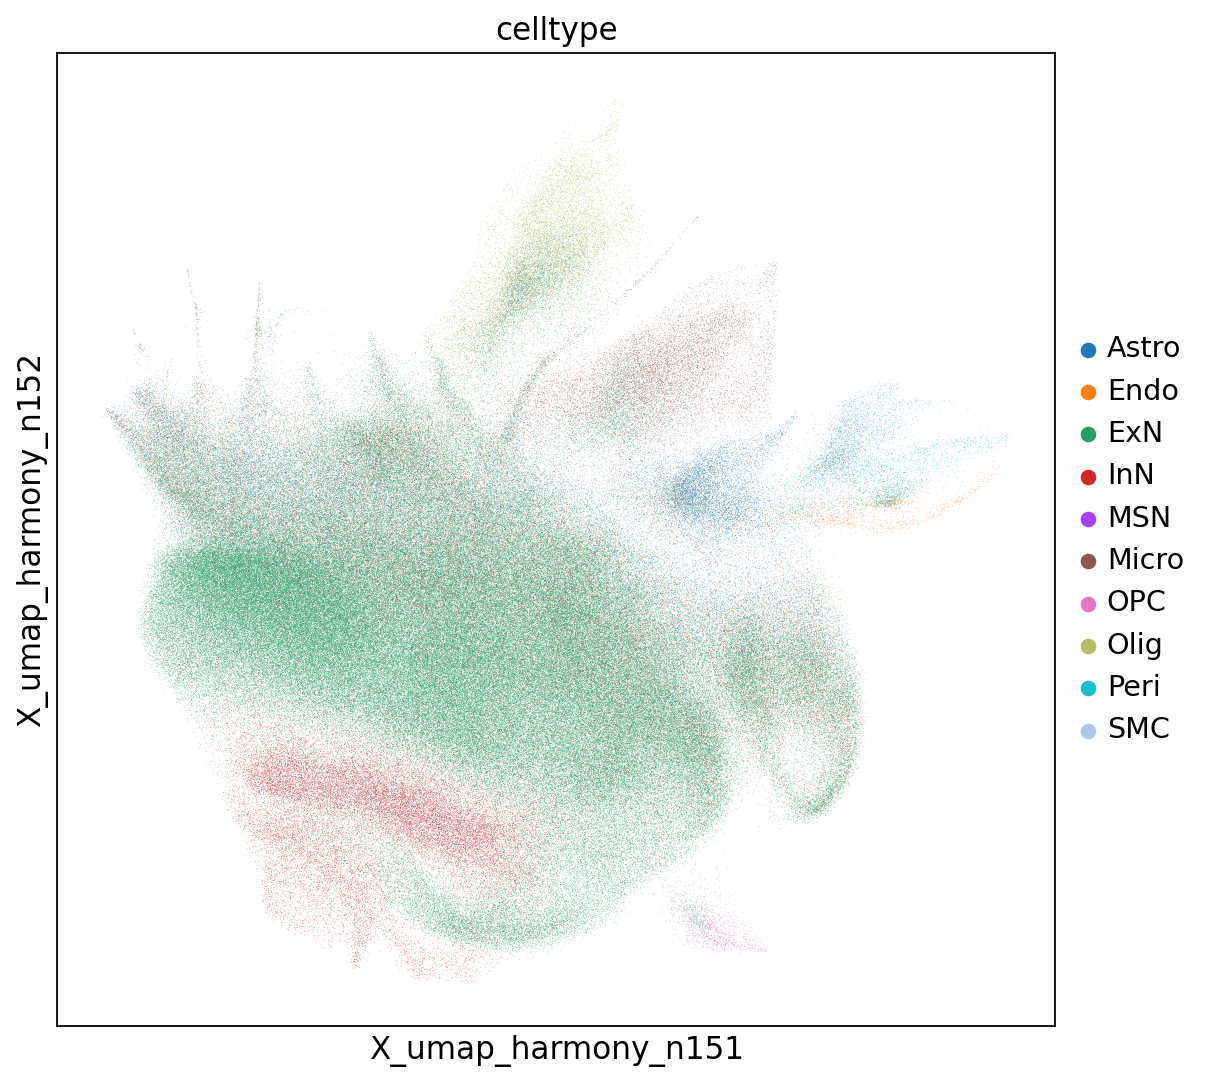

In [89]:
sc.pl.embedding(combined_adata, basis = "X_umap_harmony_n15", color = "celltype")

In [91]:
combined_adata

AnnData object with n_obs × n_vars = 509479 × 4557
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'genotype', 'month', 'sample', 'slice', 'batch', 'plaque', 'plaque_delta', 'percent.mito', 'percent.rb', 'RNA_snn_res.0.2', 'seurat_clusters', 'celltype', 'fine', 'nCount_SCT', 'nFeature_SCT', 'datatype', 'Unnamed: 0', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'x', 'y', 'id_A', 'age', 'nearest_plaque', 'interval', 'min_center_dist', 'min_border_dist', 'plaque_region', 'nearest_index', 'struct_id', 'acronym_x', 'id_B', 'atlas_id', 'name', 'acronym_y', 'st_level', 'ontology_id', 'hemisphere_id', 'weight', 'parent_structure_id', 'depth', 'graph_id', 'graph_order', 'structure_id_path', 'color_hex_triplet', 'neuro_name_structure_id', 'neuro_name_structure_id_path', 'failed', 'sphinx_id', 'structure_name_facet', 'failed_facet', 'safe_name', 'total_voxel_counts (10 um)', 'Structure independently delineated (not merged to form parents)', 'Major Division', '"Summary Structure" Lev

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


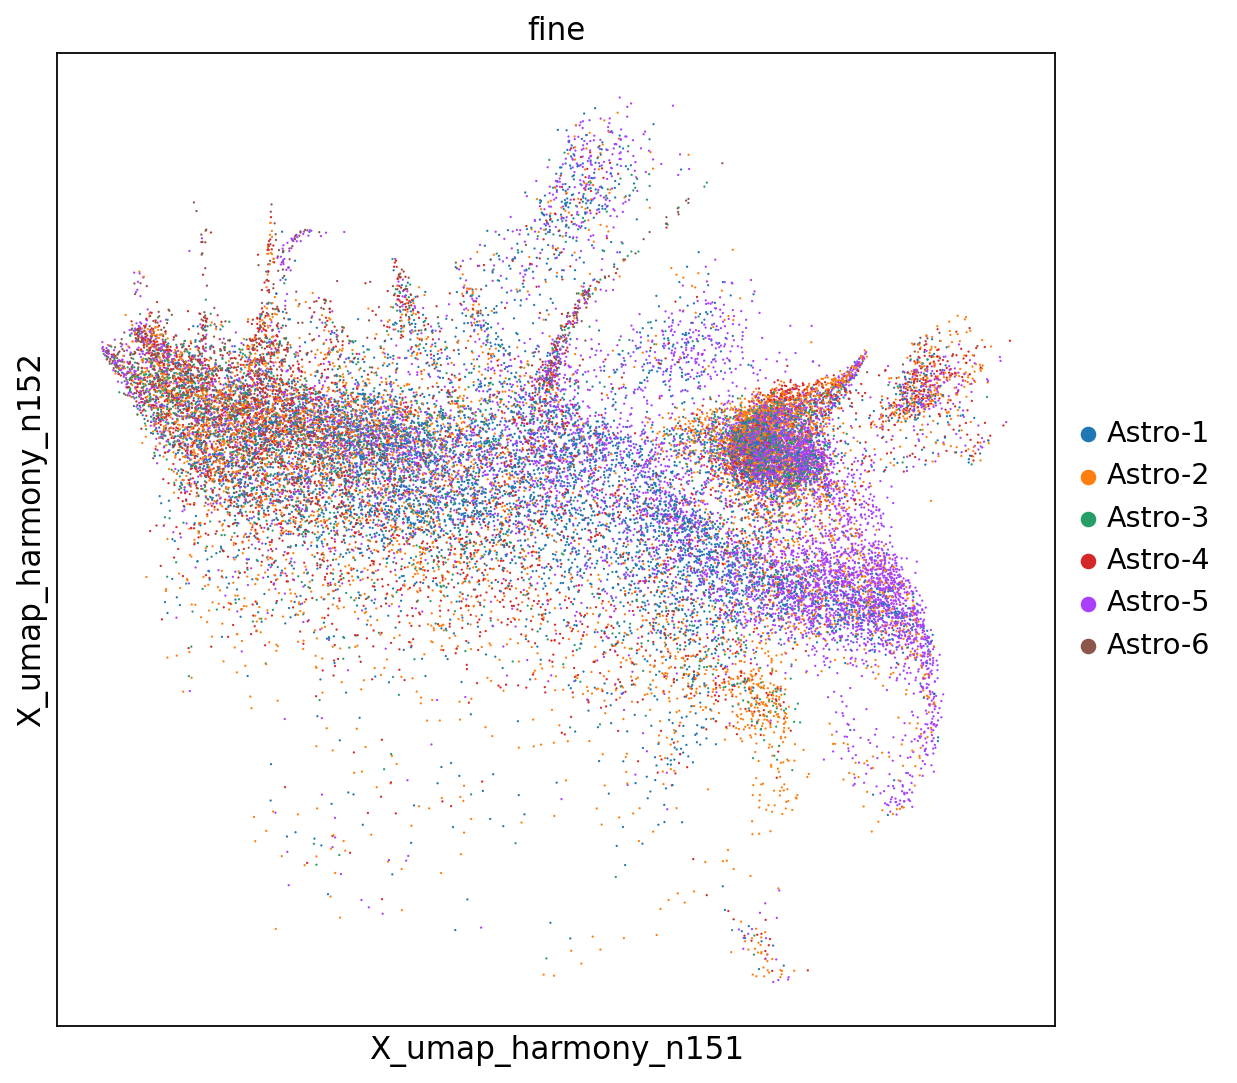

In [95]:
mask = combined_adata.obs["celltype"] == "Astro"
sc.pl.embedding(combined_adata[mask], basis = "X_umap_harmony_n15", color = "fine")

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


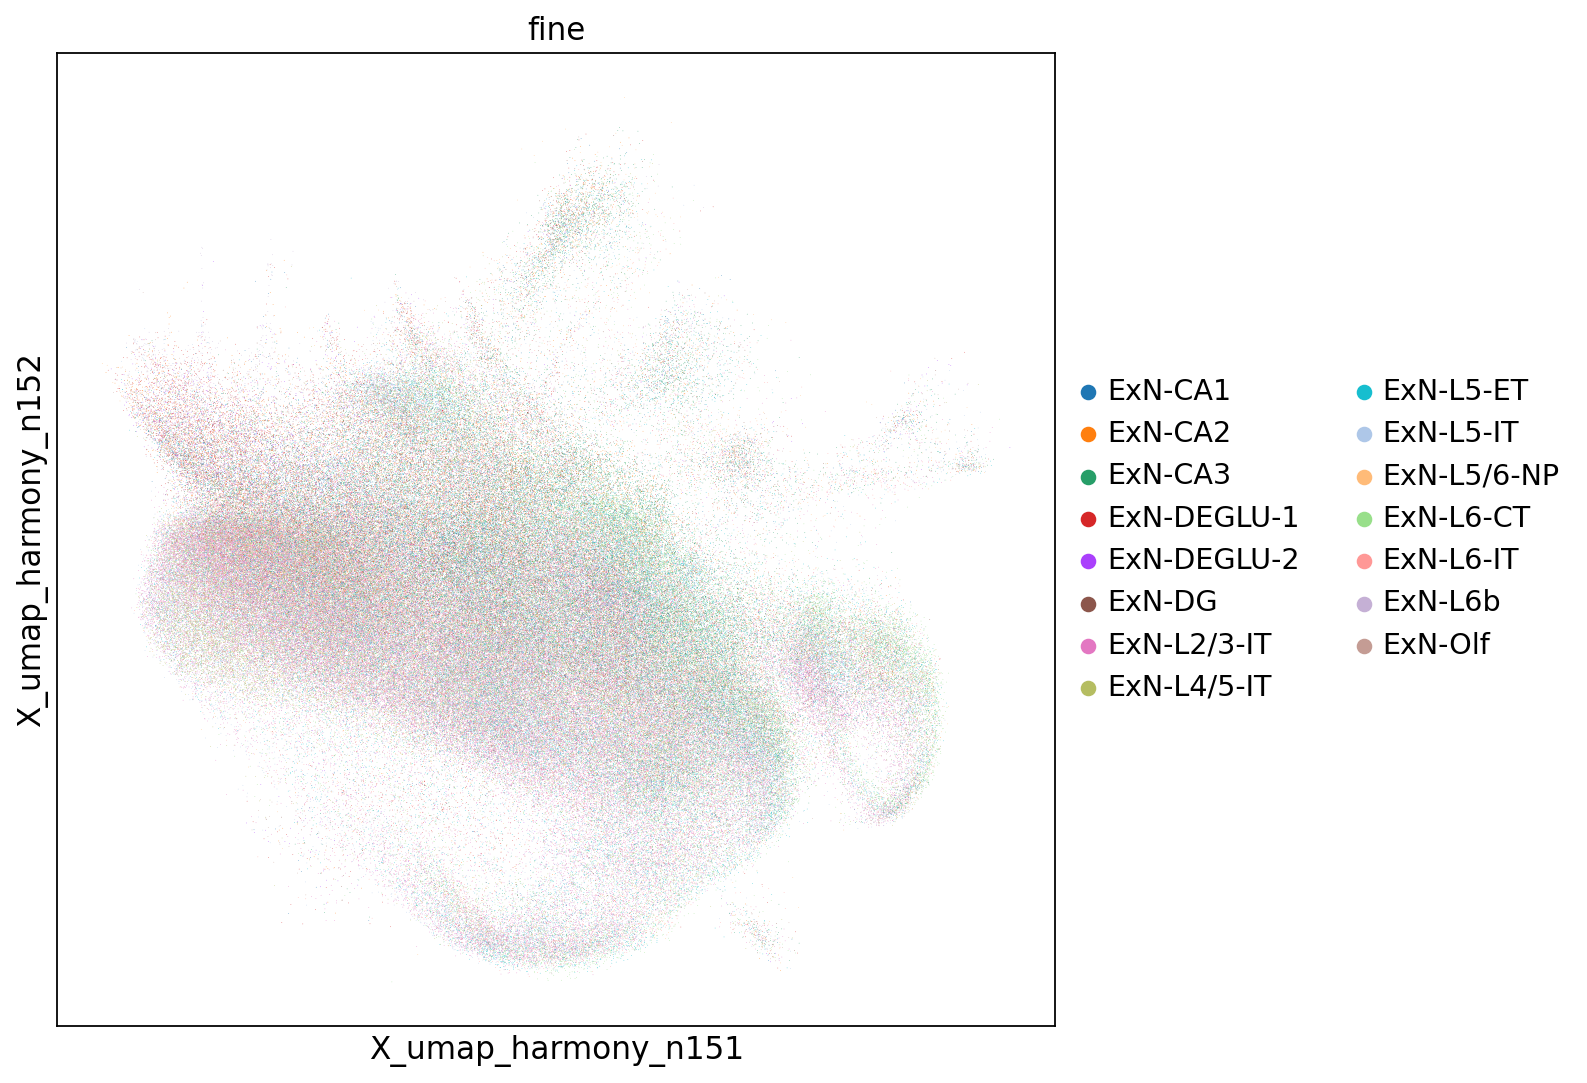

In [94]:
mask = combined_adata.obs["celltype"] == "ExN"
sc.pl.embedding(combined_adata[mask], basis = "X_umap_harmony_n15", color = "fine")

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


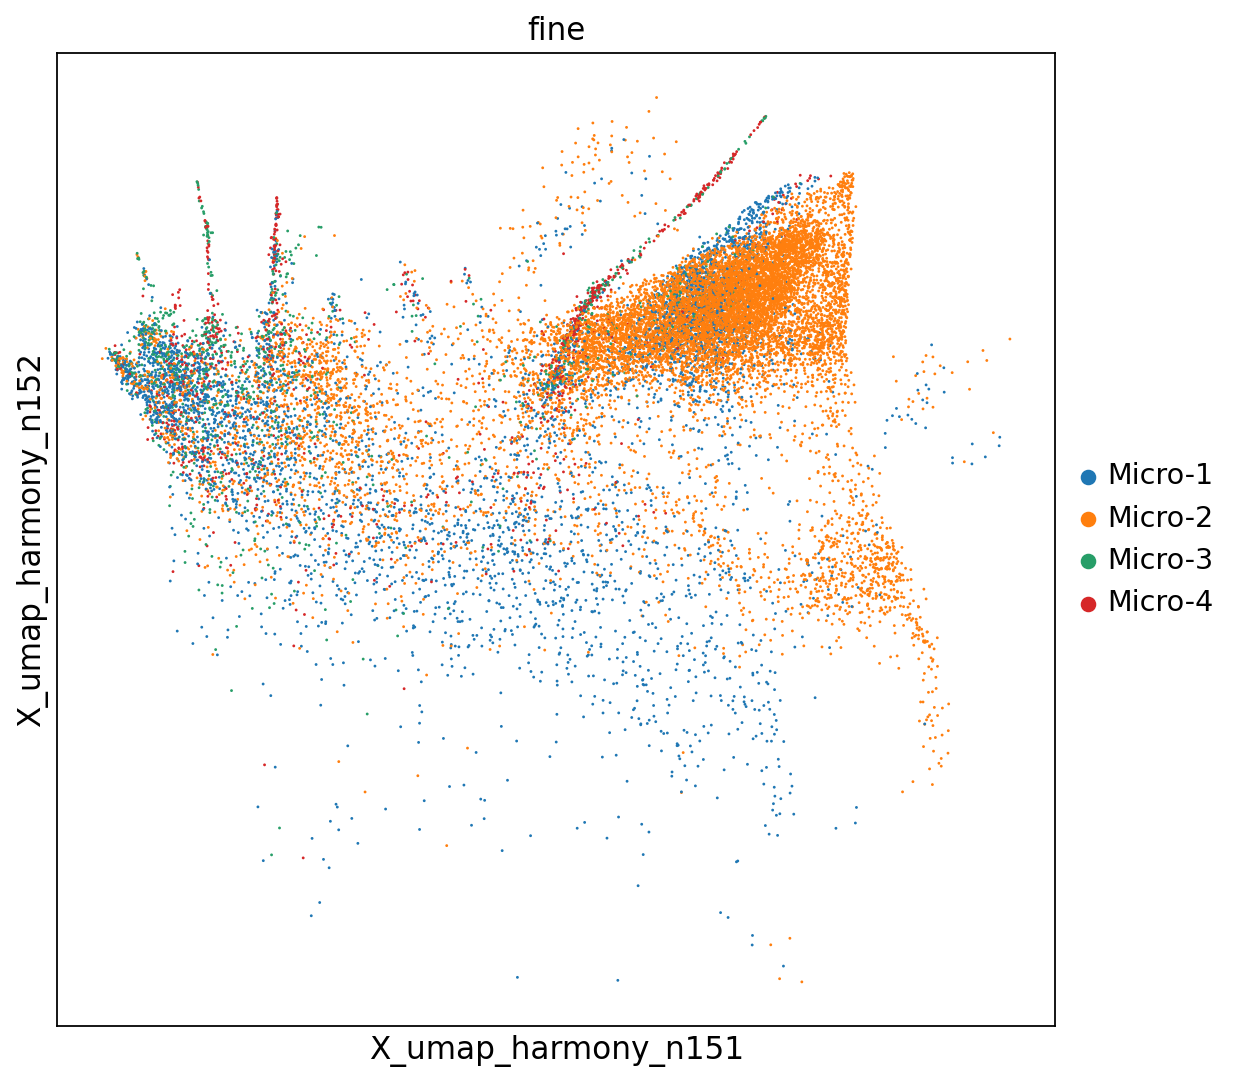

In [93]:
mask = combined_adata.obs["celltype"] == "Micro"
sc.pl.embedding(combined_adata[mask], basis = "X_umap_harmony_n15", color = "fine")

In [78]:
result_dfs

{'HZ12M_1':                  I     pval_norm  var_norm    pval_z_sim  pval_sim   var_sim  \
 celltype                                                                       
 SMC       0.269331  0.000000e+00  0.000244  0.000000e+00  0.009901  0.000276   
 Micro     0.195561  0.000000e+00  0.000112  0.000000e+00  0.009901  0.000099   
 OPC       0.151407  4.449707e-11  0.000559  3.326110e-09  0.009901  0.000655   
 Astro     0.097491  0.000000e+00  0.000049  0.000000e+00  0.009901  0.000041   
 ExN       0.061356  0.000000e+00  0.000014  0.000000e+00  0.009901  0.000008   
 Olig      0.057829  2.525956e-05  0.000209  5.662729e-06  0.009901  0.000179   
 Peri      0.043485  2.547089e-02  0.000541  1.023553e-02  0.029703  0.000329   
 InN       0.041470  1.795453e-05  0.000102  1.772374e-07  0.009901  0.000072   
 Endo      0.028245  5.648460e-02  0.000345  1.423959e-02  0.009901  0.000187   
 
           pval_norm_fdr_bh  pval_z_sim_fdr_bh  pval_sim_fdr_bh  num_cell  
 celltype           

## Neighbors - 15

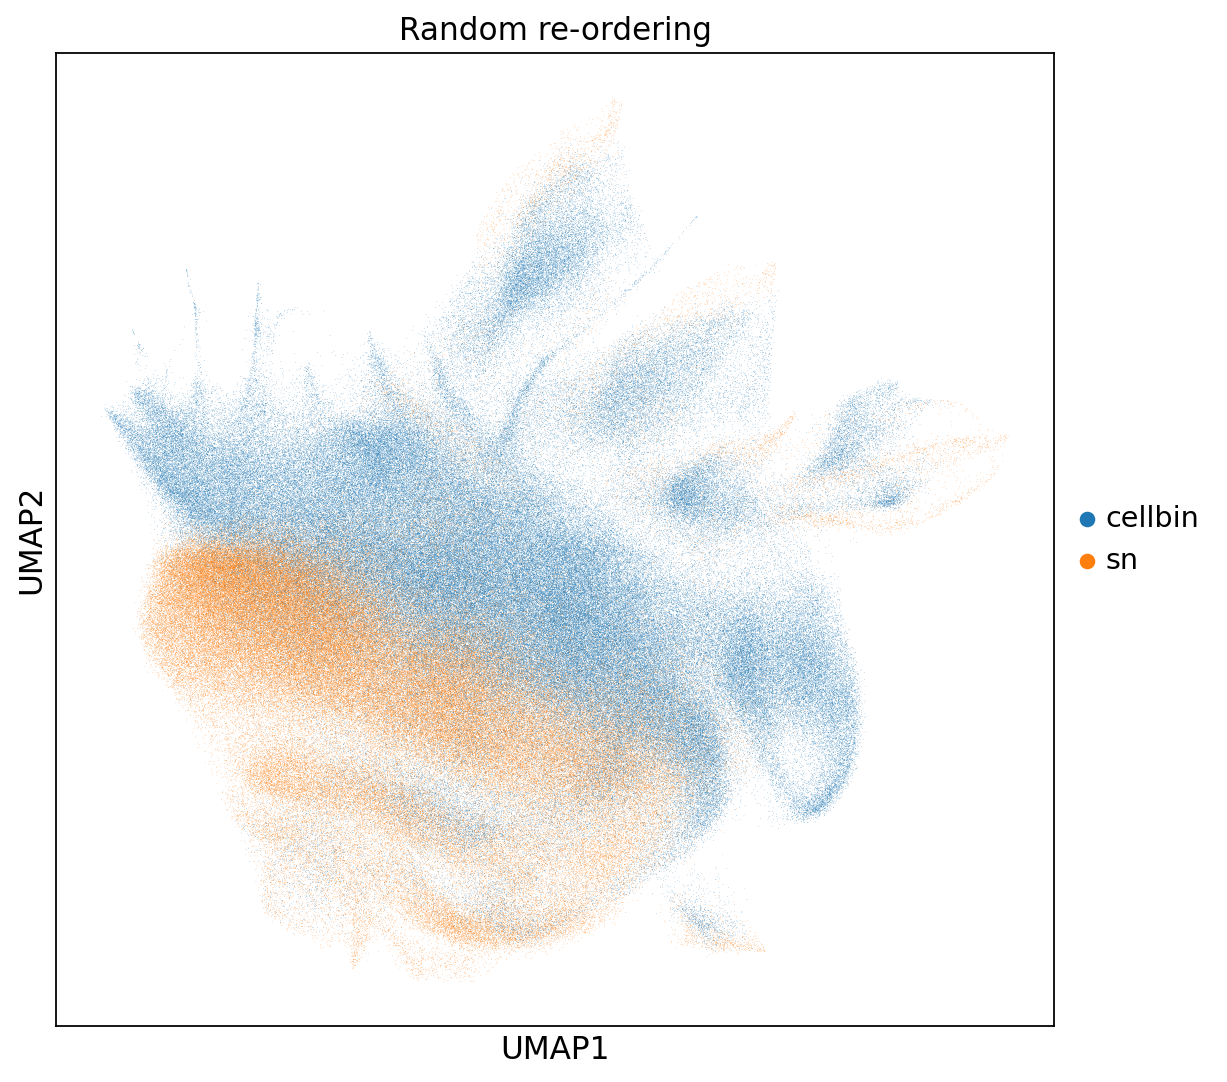

In [88]:
np.random.seed(0)
random_indices = np.random.permutation(list(range(combined_adata.shape[0])))
sc.pl.umap(
    combined_adata[random_indices, :], color="datatype", title="Random re-ordering"
)